In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
import sklearn

## data preprocessing

In [2]:
cd ..

c:\Users\kesav\OneDrive\Desktop\AI\dl\Long-term-traffic-flow-forecasting-using-a-hybrid-CNN-BiLSTM-model


In [3]:
df=pd.read_csv("Datasets/AS2(t-48).csv")
data=df["clave"]
df.drop(columns=["clave"],axis=1,inplace=True)
df['hour(t)']=list(np.arange(13,24))+list(np.arange(0,24))*1305+list(np.arange(0,12))
df=df.reindex(columns=['var1(t-48)','var2(t-48)','var3(t-48)','var4(t-48)','var5(t-48)','var6(t-48)','var7(t-48)','var8(t-48)','hour(t)','obj'])

print(df)
print(data)

       var1(t-48)  var2(t-48)  var3(t-48)  var4(t-48)  var5(t-48)  var6(t-48)  \
0             799      1442.0       658.0        76.0         0.0        36.0   
1             894       903.0       458.0        76.0         0.0        36.0   
2             760       397.0       190.0        76.0         0.0        36.0   
3             669       312.0       147.0        76.0         0.0        36.0   
4             665       299.0       124.0        76.0         0.0        36.0   
...           ...         ...         ...         ...         ...         ...   
31338        1001      1583.0       571.0       288.0         0.0       220.0   
31339        1075      1364.0       542.0       288.0         0.0       220.0   
31340         858       962.0       392.0       288.0         0.0       220.0   
31341         750       679.0       247.0       288.0         0.0       220.0   
31342         713       593.0       191.0       288.0         0.0       220.0   

       var7(t-48) var8(t-48

In [4]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['var8(t-48)']=le.fit_transform(df['var8(t-48)'])
# le.transform(df['var8(t-12)'])
print(df)

       var1(t-48)  var2(t-48)  var3(t-48)  var4(t-48)  var5(t-48)  var6(t-48)  \
0             799      1442.0       658.0        76.0         0.0        36.0   
1             894       903.0       458.0        76.0         0.0        36.0   
2             760       397.0       190.0        76.0         0.0        36.0   
3             669       312.0       147.0        76.0         0.0        36.0   
4             665       299.0       124.0        76.0         0.0        36.0   
...           ...         ...         ...         ...         ...         ...   
31338        1001      1583.0       571.0       288.0         0.0       220.0   
31339        1075      1364.0       542.0       288.0         0.0       220.0   
31340         858       962.0       392.0       288.0         0.0       220.0   
31341         750       679.0       247.0       288.0         0.0       220.0   
31342         713       593.0       191.0       288.0         0.0       220.0   

       var7(t-48)  var8(t-4

In [5]:
def slicing_data(data,rows):
    x=list()
    y=list()
    for i in np.arange(rows-1,len(data)):
        y.append(data.iloc[i][-1])
        x.append([data.iloc[i-3][:-1],data.iloc[i-2][:-1],data.iloc[i-1][:-1],data.iloc[i][:-1]])
    
    return np.array(x).astype('float32'),np.array(y).astype('float32')


In [6]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import  train_test_split


In [7]:

scaler=MinMaxScaler()
df[df.columns.difference(['obj'])]=scaler.fit_transform(df[df.columns.difference(['obj'])])

In [8]:
x,y=slicing_data(df,4)
print(x)
print(y)

[[[0.08009199 0.33433804 0.22783934 ... 0.27970296 0.33333334 0.5652174 ]
  [0.08959104 0.20936704 0.15858726 ... 0.27970296 0.33333334 0.6086956 ]
  [0.07619238 0.0920473  0.06578948 ... 0.27970296 0.33333334 0.65217394]
  [0.06709329 0.07233944 0.05090028 ... 0.27970296 0.33333334 0.6956522 ]]

 [[0.08959104 0.20936704 0.15858726 ... 0.27970296 0.33333334 0.6086956 ]
  [0.07619238 0.0920473  0.06578948 ... 0.27970296 0.33333334 0.65217394]
  [0.06709329 0.07233944 0.05090028 ... 0.27970296 0.33333334 0.6956522 ]
  [0.06669333 0.0693253  0.04293629 ... 0.27970296 0.33333334 0.73913044]]

 [[0.07619238 0.0920473  0.06578948 ... 0.27970296 0.33333334 0.65217394]
  [0.06709329 0.07233944 0.05090028 ... 0.27970296 0.33333334 0.6956522 ]
  [0.06669333 0.0693253  0.04293629 ... 0.27970296 0.33333334 0.73913044]
  [0.05339466 0.0839323  0.04466759 ... 0.27970296 0.33333334 0.7826087 ]]

 ...

 [[0.10158984 0.37166706 0.20637119 ... 0.87623763 0.6666667  0.26086956]
  [0.10028997 0.3670299  0

In [9]:
print(x[0].shape)
print(y.shape)

(4, 9)
(31340,)


In [10]:
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.333,random_state=101)

In [11]:
 y_test.shape

(10437,)

# model training

In [12]:
import tensorflow.keras.layers as layers

In [13]:
input_layer=layers.Input(shape=(4,9,1))
layer_1=layers.TimeDistributed(layers.Conv1D(filters=512,kernel_size=2,activation="relu"))(input_layer)
layer_2=layers.TimeDistributed(layers.MaxPool1D(pool_size=2, padding='same'))(layer_1)
layer_3=layers.TimeDistributed(layers.Flatten())(layer_2)
layer_4=layers.Dropout(0.5)(layer_3)
layer_5=layers.Bidirectional(layers.LSTM(512, activation = 'relu'))(layer_4)
layer_6=layers.BatchNormalization()(layer_5)
output_layer=layers.Dense(1)(layer_6)
model_1=tf.keras.Model(inputs=input_layer,outputs=output_layer)


In [14]:
model_1.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 4, 9, 1)]         0         
                                                                 
 time_distributed (TimeDist  (None, 4, 8, 512)         1536      
 ributed)                                                        
                                                                 
 time_distributed_1 (TimeDi  (None, 4, 4, 512)         0         
 stributed)                                                      
                                                                 
 time_distributed_2 (TimeDi  (None, 4, 2048)           0         
 stributed)                                                      
                                                                 
 dropout (Dropout)           (None, 4, 2048)           0         
                                                             

In [15]:
model_1.compile(optimizer='adam',loss='mse',metrics=[tf.keras.metrics.MeanAbsoluteError()])
history_1=model_1.fit(X_train,y_train,epochs=100,batch_size = 32, shuffle=True,validation_data=(X_test,y_test))

Epoch 1/100
654/654 [==============================] - ETA: 0s - loss: 158378.5000 - mean_absolute_error: 307.9882

# model evaluation

In [ ]:
model_1.save('model_48.h5')

c:\Users\kesav\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
from tensorflow.keras.models import load_model

In [ ]:
savedModel=load_model('model_48.h5')
savedModel.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 4, 9, 1)]         0         
                                                                 
 time_distributed (TimeDist  (None, 4, 8, 256)         768       
 ributed)                                                        
                                                                 
 time_distributed_1 (TimeDi  (None, 4, 4, 256)         0         
 stributed)                                                      
                                                                 
 time_distributed_2 (TimeDi  (None, 4, 1024)           0         
 stributed)                                                      
                                                                 
 dropout (Dropout)           (None, 4, 1024)           0         
                                                             

In [ ]:
pred=savedModel.predict(X_test)
pred

327/327 [==============================] - 14s 42ms/step


array([[ 34.157825],
       [ 25.100216],
       [313.311   ],
       ...,
       [227.22293 ],
       [400.66428 ],
       [931.395   ]], dtype=float32)

In [ ]:
pred=pred.reshape(pred.shape[0])
y_test=y_test.reshape(y_test.shape[0])

In [ ]:
MAE = sklearn.metrics.mean_absolute_error(pred,y_test)
print(MAE)

63.64144


In [ ]:
import random

In [24]:

rand=random.randint(0,30000)
rand

16415

In [25]:
y1=y[rand:rand+500]
x1=savedModel.predict(x[rand:rand+500])


16/16 [==============================] - 1s 38ms/step


In [26]:
x1=x1.reshape(x1.shape[0])
x1

array([ 429.6326  ,  564.791   , 1040.1896  ,  990.8472  ,  846.9297  ,
        561.3645  ,  354.66544 ,  273.08432 ,  187.64474 ,  106.735146,
         47.201298,   65.10176 ,   43.176136,   66.9675  ,  234.41544 ,
        684.6909  , 1078.9014  ,  807.8559  ,  723.14624 ,  801.6355  ,
        815.994   ,  625.7749  ,  573.09204 ,  398.7318  ,  598.0884  ,
        868.0049  ,  594.27905 ,  610.6653  ,  855.64795 ,  701.01904 ,
        435.51413 ,  340.21747 ,  325.6785  ,   51.689793,   23.54827 ,
         21.49357 ,   34.040874,   35.32771 ,  185.90897 ,  661.0641  ,
       1055.7072  ,  841.886   ,  798.04065 ,  759.2389  ,  790.06433 ,
        814.72296 ,  784.82764 ,  822.882   ,  879.01263 ,  999.4893  ,
       1069.3757  ,  989.6549  ,  750.5555  ,  494.9927  ,  307.0264  ,
        236.07462 ,  144.69278 ,   65.843506,   39.809498,   28.793226,
         27.283478,   52.423267,  188.55757 ,  698.1686  , 1087.5017  ,
        888.23395 ,  794.95337 ,  793.6305  ,  776.4986  ,  801.

In [27]:
import matplotlib.pylab as plt

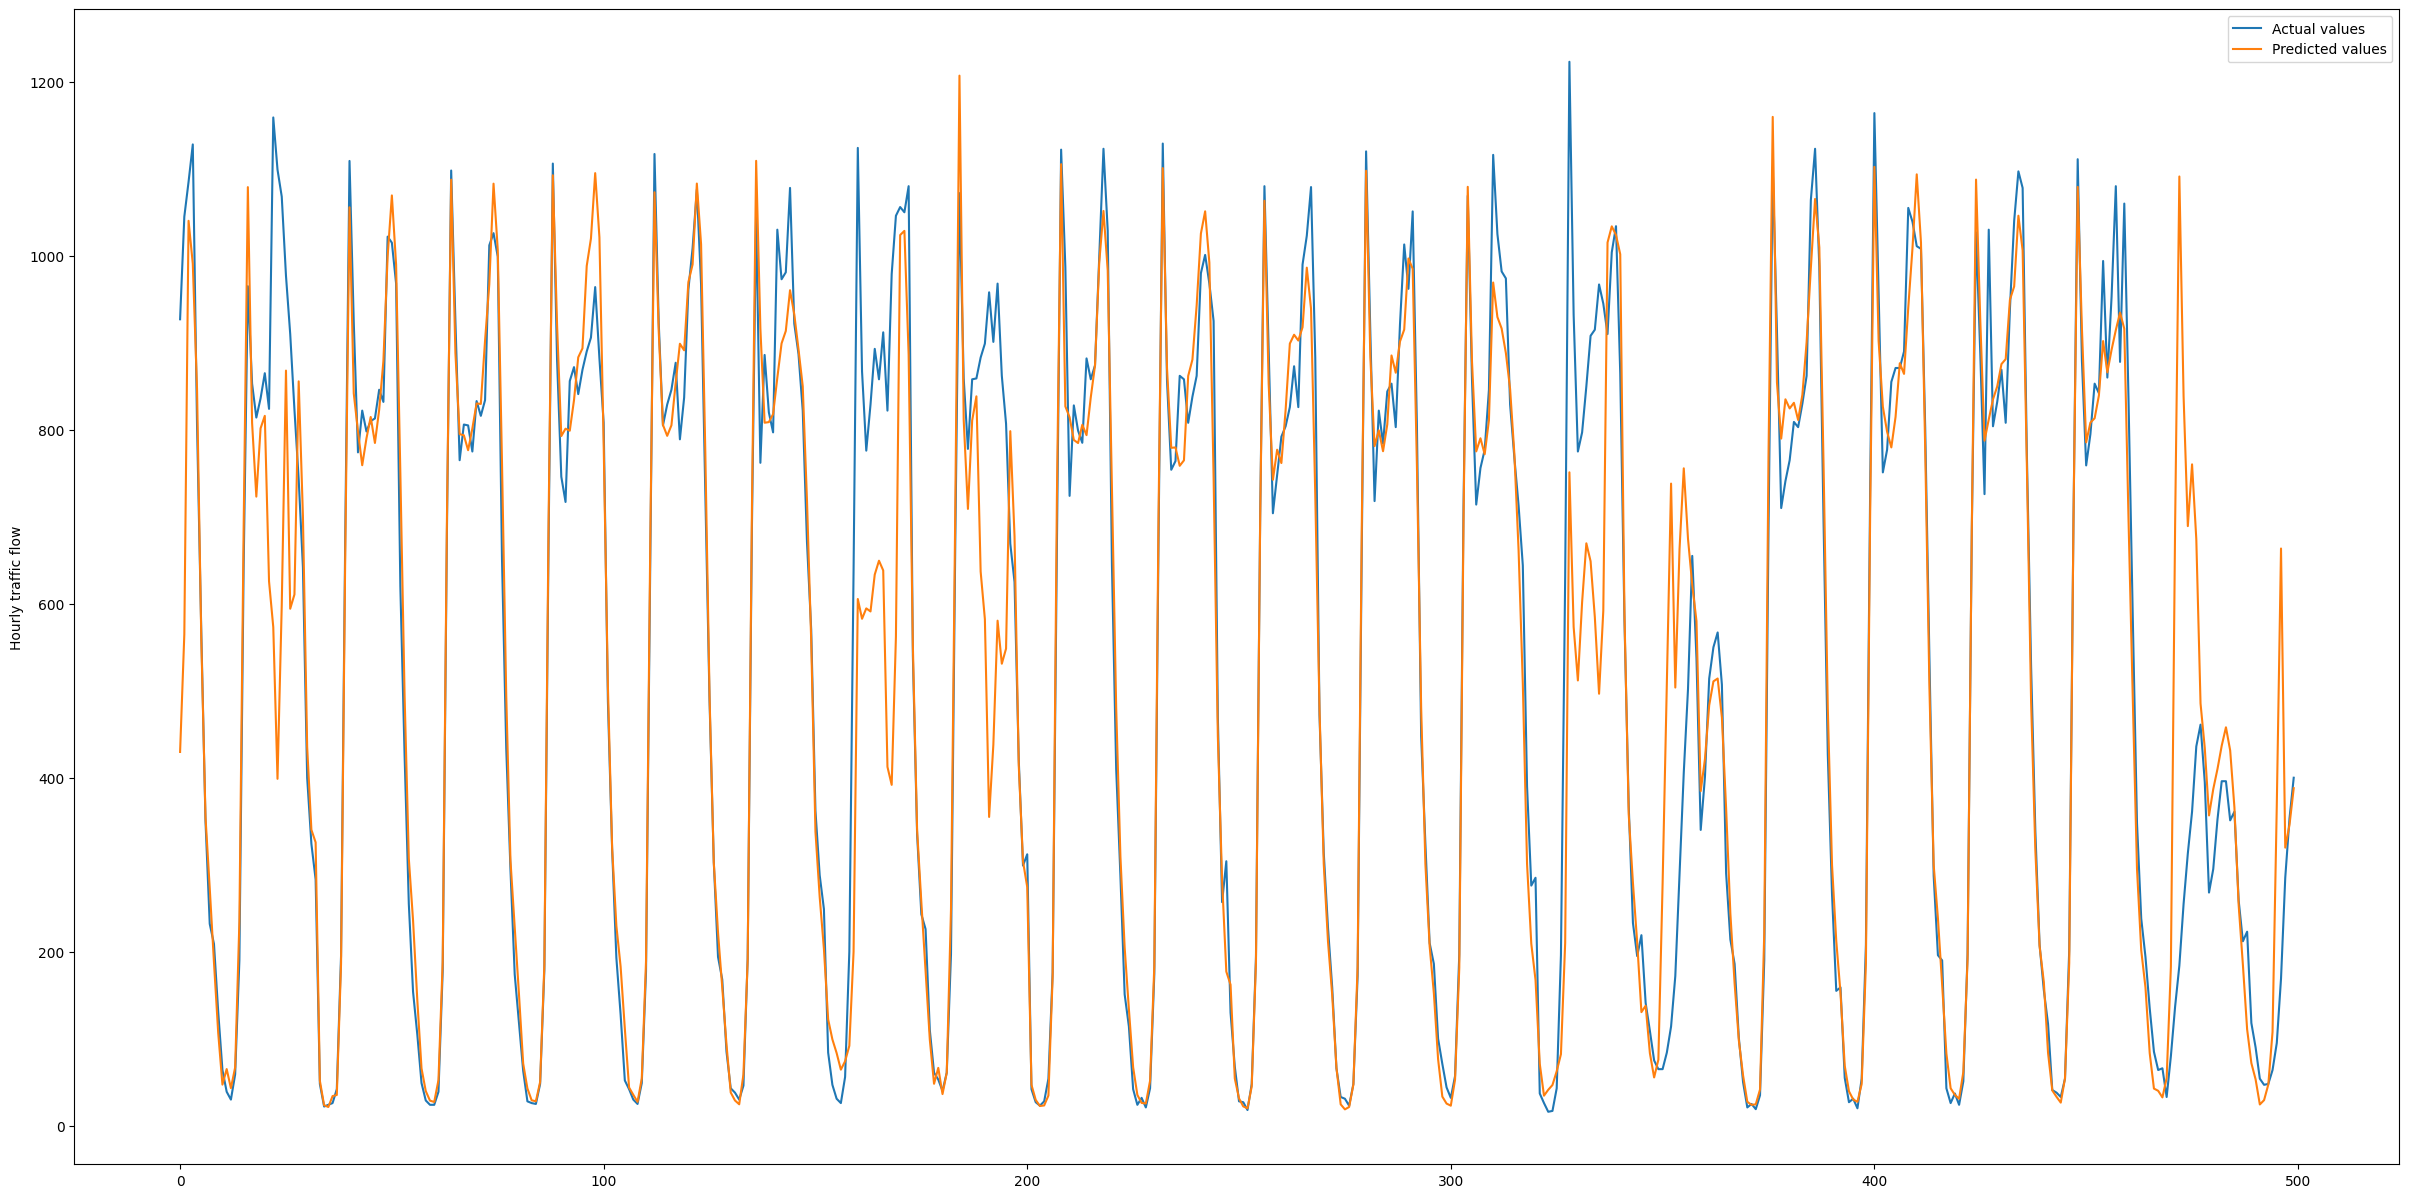

In [28]:
plt.figure(figsize=(30, 15))
plt.plot(y1, label = "Actual values")
plt.plot(x1, label = "Predicted values")
plt.legend()
plt.ylabel('Hourly traffic flow')
plt.show()